In [1]:
import pandas as pd
import pickle
import cv2
import matplotlib.pyplot as plt
import preprocessing
import numpy as np

In [2]:
df = pd.read_csv("../Dataset/labels_test.csv",index_col=0)
df.head()

,Image path,Class,Weight
0,Dataset/Test/FBO1/cacao-1.jpg,FBO1,1.50
1,Dataset/Test/FBO1/cacao-2.jpg,FBO1,1.43
2,Dataset/Test/FBO1/cacao-3.jpg,FBO1,1.45
3,Dataset/Test/FBO1/cacao-4.jpg,FBO1,1.45
4,Dataset/Test/FBO1/cacao-5.jpg,FBO1,1.24


In [3]:
from tqdm import tqdm
test_data = []

for i in tqdm(range(len(df))):
    img = cv2.imread("../" + df.iloc[i]["Image path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    attr = preprocessing.extract_attributes(img)

    flattened = [item for sublist in attr for item in (sublist if isinstance(sublist, np.ndarray) else [sublist])]

    test_data.append(flattened)

test = pd.DataFrame(test_data, columns=preprocessing.get_all_columns())

test = test[preprocessing.get_columns()]
test.head()

100%|██████████| 180/180 [00:21<00:00,  8.36it/s]


,area,eccentricity,extent,GLCM Contrast,GLCM dissimilarity,GLCM homogeneity,GLCM ASM,GLCM energy,GLCM correlation,hist_r5,...,hist_v9,hist_v10,hist_v11,hist_v12,hist_v13,hist_v14,hist_v15,hist_v16,hist_v17,hist_v18
0,17535.0,0.724617,0.771346,0.952273,3.611906,0.404085,0.008753,0.093560,0.952273,0.0,...,4320.0,5241.0,3745.0,1447.0,263.0,203.0,231.0,324.0,102.0,0.0
1,15811.0,0.784854,0.755423,0.957507,3.504364,0.395377,0.008252,0.090839,0.957507,0.0,...,4204.0,5374.0,3212.0,556.0,202.0,194.0,240.0,249.0,17.0,0.0
2,19755.0,0.759615,0.739057,0.956669,3.846269,0.400504,0.008772,0.093658,0.956669,0.0,...,5490.0,5637.0,4232.0,1952.0,271.0,153.0,180.0,217.0,52.0,0.0
3,15807.0,0.784169,0.736031,0.959143,3.394236,0.417254,0.009203,0.095935,0.959143,0.0,...,3719.0,4328.0,3082.0,1545.0,327.0,198.0,249.0,211.0,4.0,0.0
4,15605.0,0.774226,0.755763,0.953216,3.605596,0.405617,0.009186,0.095843,0.953216,0.0,...,4243.0,3592.0,3004.0,1435.0,336.0,211.0,225.0,227.0,0.0,0.0


In [4]:
import joblib


scaler = joblib.load("models/scaler.pkl")

X = scaler.transform(test)
X = pd.DataFrame(X, columns=preprocessing.get_columns())
Y = df["Weight"]

In [12]:
test_df = X.copy()
test_df["Weight"] = Y.copy()

test_df.to_csv("attributes_std_test.csv")

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
R-squared (R2) Score: 0.88
Mean Absolute Percentage Error (MAPE): 6.87%


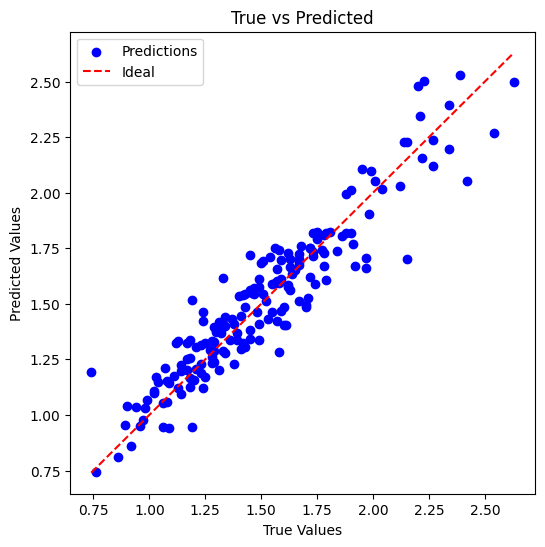

In [9]:
# SVC test

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

with open("models/svr.pkl", 'rb') as file:
    svc = pickle.load(file)

predictions = svc.predict(X)

mae = mean_absolute_error(Y, predictions)
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y, predictions)
mape = np.mean(np.abs((np.array(Y) - np.array(predictions)) / np.array(Y))) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(6, 6))
plt.scatter(Y, predictions, color='blue', label='Predictions')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], 'r--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R2) Score: 0.83
Mean Absolute Percentage Error (MAPE): 7.97%


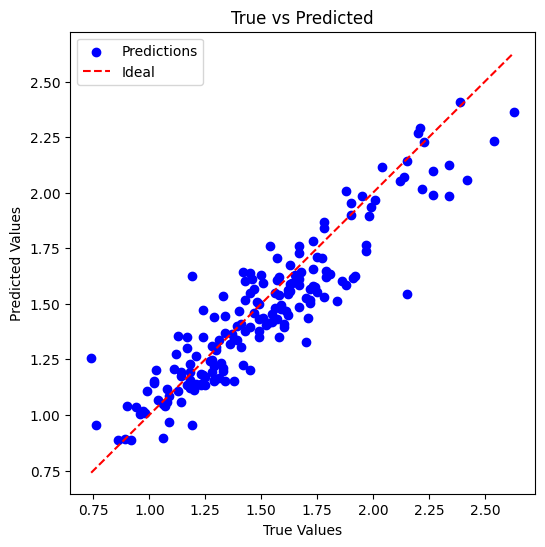

In [8]:
# knn test

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

with open("models/knn.pkl", 'rb') as file:
    model = pickle.load(file)

predictions = model.predict(X)

mae = mean_absolute_error(Y, predictions)
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y, predictions)
mape = np.mean(np.abs((np.array(Y) - np.array(predictions)) / np.array(Y))) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(6, 6))
plt.scatter(Y, predictions, color='blue', label='Predictions')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], 'r--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2) Score: 0.86
Mean Absolute Percentage Error (MAPE): 7.12%


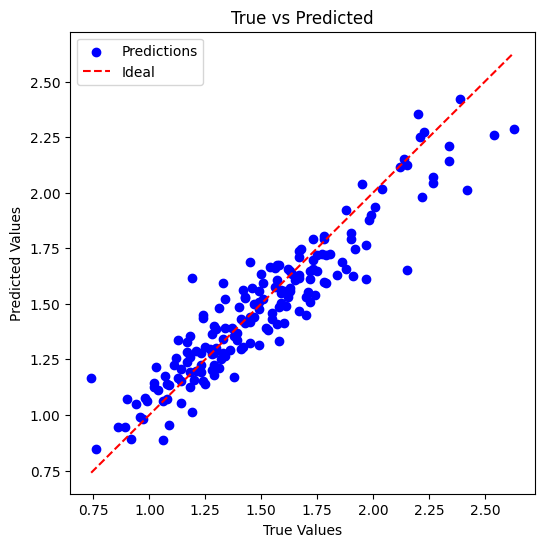

In [10]:
# rf test

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

with open("models/rf.pkl", 'rb') as file:
    model = pickle.load(file)

predictions = model.predict(X)

mae = mean_absolute_error(Y, predictions)
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y, predictions)
mape = np.mean(np.abs((np.array(Y) - np.array(predictions)) / np.array(Y))) * 100

print(f"    : {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(6, 6))
plt.scatter(Y, predictions, color='blue', label='Predictions')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], 'r--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted')
plt.legend()
plt.show()